<h1>Import Libraries<h1>

In [1021]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn import preprocessing
from sklearn import metrics

In [1022]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1>Datensatz einlesen<h1>

In [1023]:
path = "Case_Mailing_2022.csv"

In [1024]:
df = pd.read_csv(path, sep=';', decimal=',')

<h1>Erster Überblick über die Daten<h1>

In [1025]:
df.shape

(21740, 33)

In [1026]:
df.head()

,ZIP_CODE,DAYS_SINCE_PURCHASE,PURCHASE_VISITS,TOTAL_NET_SALES,CC_CARD,AVE_AMOUNT_SPENT,AMSPEND,PSSPEND,CCSPEND,AXSPEND,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,ZIP_1001,208,2,368.46,0,184.23,0.0,0.0,368.46,0.0,...,0,0,5,0,0.0000,0.3181,111.00,Cluster_10,0.000000e+00,0
1,ZIP_1028,6,4,258.00,1,64.50,0.0,0.0,258.00,0.0,...,1,0,4,2,0.5000,0.3272,43.50,Cluster_10,3.000000e-08,1
2,ZIP_1056,327,2,77.00,0,38.50,0.0,0.0,77.00,0.0,...,0,0,4,0,0.0000,1.0000,68.60,Cluster_16,0.000000e+00,0
3,ZIP_1118,66,8,846.06,1,105.75,0.0,0.0,846.06,0.0,...,1,0,9,6,0.6667,0.2327,26.96,Cluster_10,0.000000e+00,0
4,ZIP_1107,49,1,87.44,0,87.44,0.0,0.0,87.44,0.0,...,1,0,0,0,0.0000,0.2852,24.50,Cluster_20,0.000000e+00,0


<h1>Data Preparation<h1>

In [1027]:
df["ZIP_CODE"] = df["ZIP_CODE"].apply(lambda x:x.split("_")[1])

In [1028]:
df["ZIP_CODE"]

0         1001
1         1028
2         1056
3         1118
4         1107
         ...  
21735    63105
21736    72207
21737    77084
21738    78640
21739    95605
Name: ZIP_CODE, Length: 21740, dtype: object

In [1029]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP_CODE             21740 non-null  object 
 1   DAYS_SINCE_PURCHASE  21740 non-null  int64  
 2   PURCHASE_VISITS      21740 non-null  int64  
 3   TOTAL_NET_SALES      21740 non-null  float64
 4   CC_CARD              21740 non-null  int64  
 5   AVE_AMOUNT_SPENT     21740 non-null  float64
 6   AMSPEND              21740 non-null  float64
 7   PSSPEND              21740 non-null  float64
 8   CCSPEND              21740 non-null  float64
 9   AXSPEND              21740 non-null  float64
 10  TMONSPEND            21740 non-null  float64
 11  OMONSPEND            21740 non-null  float64
 12  SMONSPEND            21740 non-null  float64
 13  PREVPD               21740 non-null  float64
 14  GMP                  21740 non-null  float64
 15  PROMOS               21740 non-null 

<h1>Erläuterung der Datenspalten und Betrachtung einzelner Features<h1>

*   ZIP_CODE -> *Postleitzahl*
*   DAYS_SINCE_PURCHASE -> *Tage seit Kaufdatum*
*   PURCHASE_VISITS -> *Anzahl der Kaufbesuche*
*   TOTAL_NET_SALES -> *Gesamtnettoumsatz*
*   CC_CARD -> *Kreditkartenbenutzung*
*   AVE_AMOUNT_SPENT -> *Durchschnittlicher Betrag, der pro Besuch ausgegeben wird*
*   AMSPEND -> *im Franchise AM ausgegebener Betrag*
*   PSSPEND -> *im Franchise PS ausgegebener Betrag*
*   CCSPEND -> *im Franchise CC ausgegebener Betrag*
*   AXSPEND -> *im Franchise AX ausgegebener Betrag*
*   OMONSPEND -> *im letzten Monat ausgegebener Betrag*
*   TMONSPEND -> *in den letzten drei Monaten ausgegebener Betrag*
*   SMONSPEND -> *in den letzten sechs Monaten ausgegebener Betrag*
*   PREVPD -> *im gleichen Zeitraum des letzten Jahres ausgegebener Betrag*
*   GMP -> *Prozentsatz der Bruttomarge*
*   PROMOS -> *Anzahl der gespeicherten Marketingaktionen*
*   DAYS -> *Anzahl der Tage, in denen der Kunde registriert war*
*   FREDAYS -> *Anzahl der Tage zwischen den Käufen*
*   MARKDOWN -> *Abschlagsprozentsatz auf Kundenkäufe*
*   CLASSES -> *Anzahl der gekauften unterschiedlichen Produktklassen*
*   COUPONS -> *Anzahl der vom Kunden verwendeten Coupons*
*   STYLES -> *Gesamtzahl der vom Kunden gekauften Einzalartikel*
*   STORES -> *Anzahl der Geschäfte, in denen der Kunde eingekauft hat*
*   VALPHON -> *gültige Telefonnummer hinterlegt*
*   WEB -> *WEB-Shopper*
*   MAILED -> *Anzahl der im vergangenen Jahr verschickten Werbeaktionen*
*   RESPONDED -> *Anzahl der Werbeaktion, auf die im vergangenen Jahr reagiert wurde*
*   RESPONSERATE -> *Aktionsrücklauf für das vergangene Jahr*
*   HI -> *Produkteinheitlichkeit (niedriger Wert = unterschiedlicher Ausgabemuster)*
*   LTFREDAY -> *Lebenslage durchschnittliche Zeit zwischen Besuchen*
*   CLUSTYPE -> *Clusterzugehörigkeit*
*   PERCRET -> *Prozentsatz an Rückläufern*
*   RESP -> *Reaktion auf Promo*

**Wieviele Personen haben eine gültige Telefonnummer hinterlegt?**

In [1030]:
df[df["VALPHON"]==1]["VALPHON"].size

18687

**Wieviele Personen haben keine gültige Telefonnummer hinterlegt?**

In [1031]:
df[df["VALPHON"]==0]["VALPHON"].size

3053

**Wie hoch ist der Prozentsatz an Rückläufern im Mittel?**

In [1032]:
print(df["PERCRET"].mean()*100, "%")

5.22222494746706 %


**Wieviele Einzelartikel werden im Mittel gekauft?**

In [1033]:
df["STYLES"].mean()

17.20515179392824

**Über welche Features wird am Meisten gekauft?**

In [1034]:
print("AM: ",df[df["AMSPEND"]!=0].shape[0])
print("PS: ",df[df["PSSPEND"]!=0].shape[0])
print("CC: ",df[df["CCSPEND"]!=0].shape[0])
print("AX: ",df[df["AXSPEND"]!=0].shape[0])

AM:  1075
PS:  9636
CC:  21740
AX:  2884


In [1035]:
am = df["AMSPEND"].sum()
ps = df["PSSPEND"].sum()
cc = df["CCSPEND"].sum()
ax = df["AXSPEND"].sum()
liste = [am,ps,cc,ax]

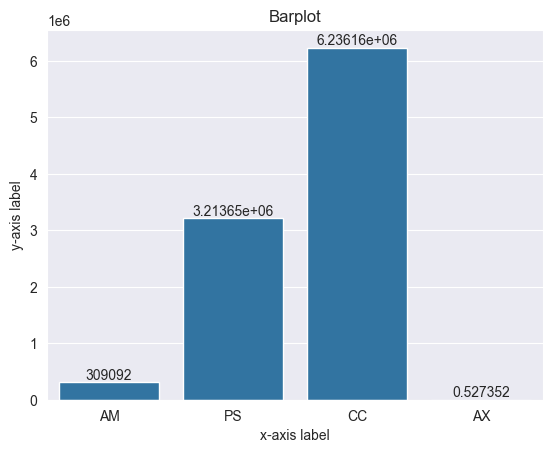

In [1036]:
ax = sns.barplot(x=["AM","PS","CC","AX"], y=liste)
ax.set(xlabel='x-axis label', ylabel='y-axis label',title="Barplot")
ax.bar_label(ax.containers[0])
plt.show()

In [1037]:
df.columns

Index(['ZIP_CODE', 'DAYS_SINCE_PURCHASE', 'PURCHASE_VISITS', 'TOTAL_NET_SALES',
       'CC_CARD', 'AVE_AMOUNT_SPENT', 'AMSPEND', 'PSSPEND', 'CCSPEND',
       'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP',
       'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES',
       'STORES', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI',
       'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP'],
      dtype='object')

<h1>Korrelationen<h1>

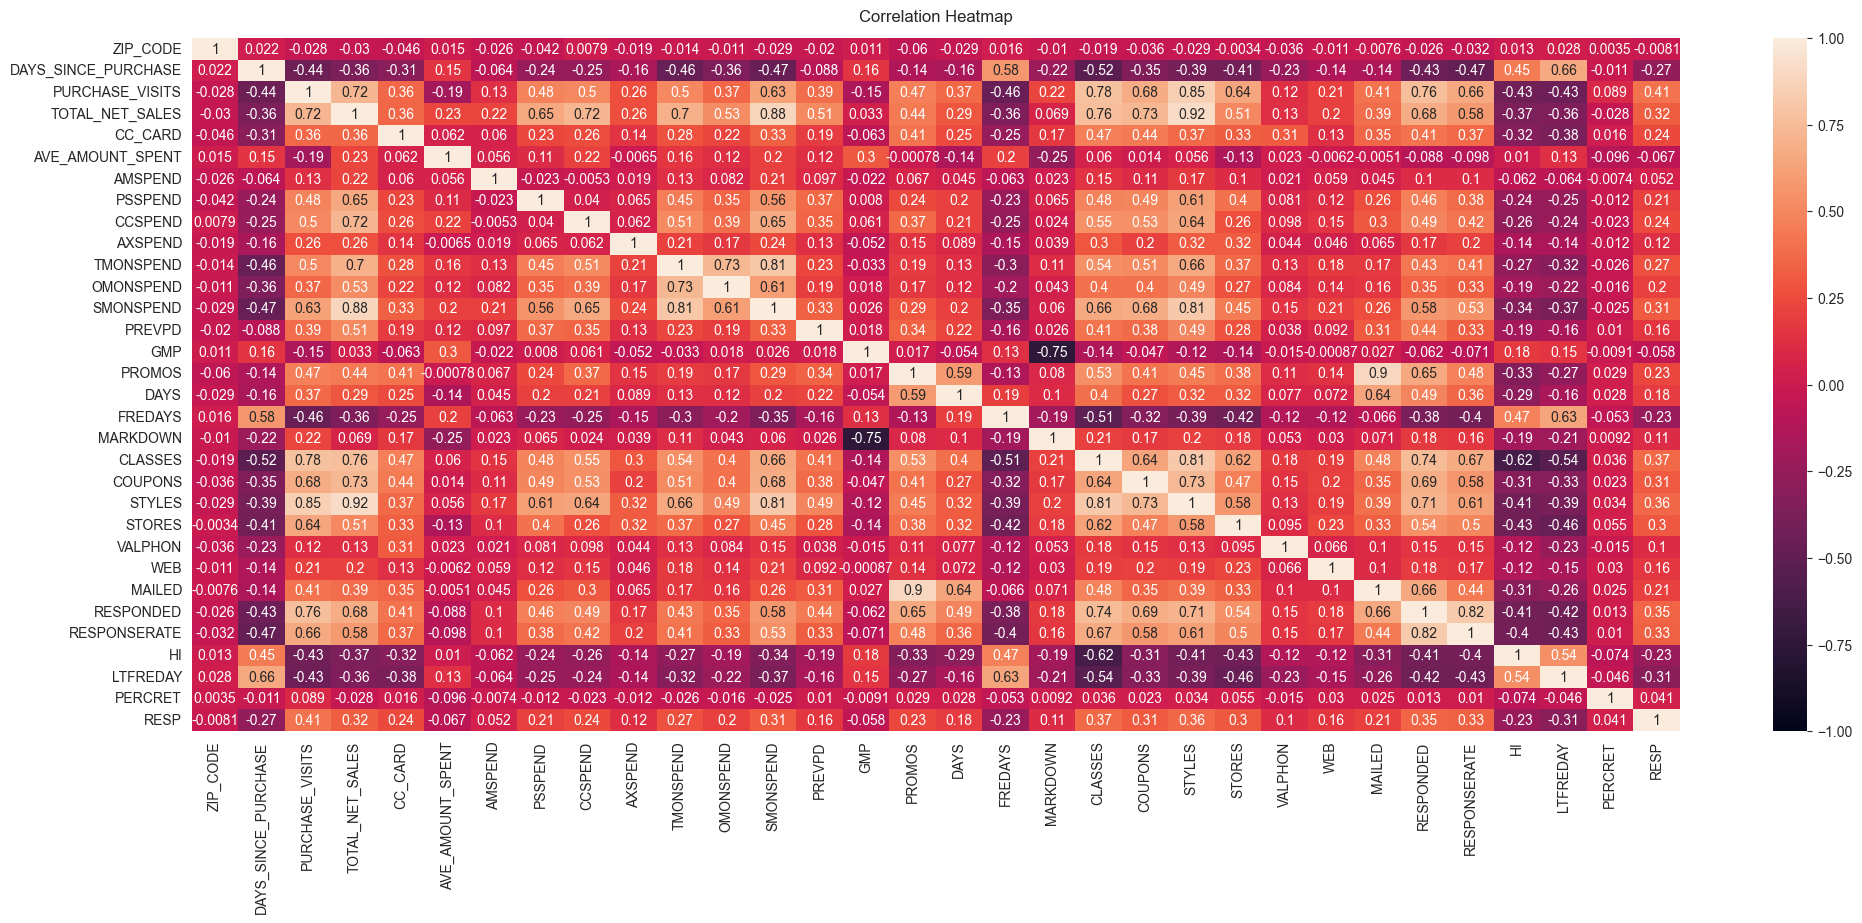

In [1038]:
plt.figure(figsize=(24,9))

df_without_clustype = df.loc[:,df.columns != "CLUSTYPE"]
heatmap = sns.heatmap(df_without_clustype.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

In [1039]:
df_corr = df_without_clustype.corr()
high_resp_corr = df_corr[df_corr["RESP"]>0.3]
high_resp_corr["RESP"]

PURCHASE_VISITS    0.407606
TOTAL_NET_SALES    0.322801
SMONSPEND          0.310150
CLASSES            0.372776
COUPONS            0.307182
STYLES             0.364063
STORES             0.304242
RESPONDED          0.350589
RESPONSERATE       0.331459
RESP               1.000000
Name: RESP, dtype: float64

In [1040]:
low_resp_corr = df_corr[df_corr["RESP"]<-0.3]
low_resp_corr["RESP"]

LTFREDAY   -0.307191
Name: RESP, dtype: float64

In [1041]:
print("Anzahl RESP Yes: ",sum(df["RESP"]))
print("Anteil RESP Yes: ",(sum(df["RESP"])/df.shape[0]*100),"%")

Anzahl RESP Yes:  3611
Anteil RESP Yes:  16.6099356025759 %


Text(0, 0.5, 'Anzahl Daten')

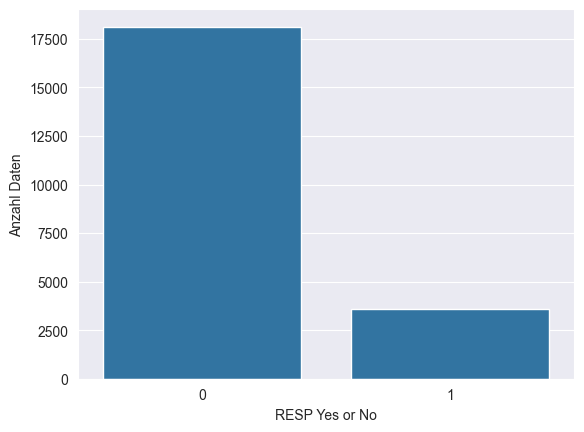

In [1042]:
cp_resp = sns.countplot(x="RESP", data=df)
cp_resp.set_xlabel("RESP Yes or No")
cp_resp.set_ylabel("Anzahl Daten")

<h1>Get Dummies für object Spalten<h1>

In [1043]:
# Convert the "type" variable to dummy variables
df = pd.get_dummies(df, columns=['CLUSTYPE'])

In [1044]:
df.shape

(21740, 83)

In [1045]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP_CODE             21740 non-null  object 
 1   DAYS_SINCE_PURCHASE  21740 non-null  int64  
 2   PURCHASE_VISITS      21740 non-null  int64  
 3   TOTAL_NET_SALES      21740 non-null  float64
 4   CC_CARD              21740 non-null  int64  
 5   AVE_AMOUNT_SPENT     21740 non-null  float64
 6   AMSPEND              21740 non-null  float64
 7   PSSPEND              21740 non-null  float64
 8   CCSPEND              21740 non-null  float64
 9   AXSPEND              21740 non-null  float64
 10  TMONSPEND            21740 non-null  float64
 11  OMONSPEND            21740 non-null  float64
 12  SMONSPEND            21740 non-null  float64
 13  PREVPD               21740 non-null  float64
 14  GMP                  21740 non-null  float64
 15  PROMOS               21740 non-null 

<h1>Funktion für den Train Test Validation Split<h1>

In [1046]:
def split_train_test(df):
    random_state = 4711
    features = [x for x in df.columns if x!= "RESP"]
    X = df[features]
    y = df["RESP"]
    X_train, X_test_2, y_train, y_test_2 = train_test_split(X, y, test_size = 0.05, random_state=random_state)
    X_train, X_test_1, y_train, y_test_1 = train_test_split(X_train, y_train, test_size = 0.2, random_state=random_state)
    return X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1

In [1047]:
def get_result(y_true, y_predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    print("Y-true Typ: ", type(y_true))
    print("y_predicted Typ: ", type(y_predicted))

    y_true = y_true.to_list()
    y_predicted = y_predicted.tolist()

    print("y_true: ", y_true)
    print("y_predicted: ", y_predicted)

    for i in range(len(y_predicted)):
        if y_true[i]==y_predicted[i]==1:
            TP += 1
        if y_predicted[i]==1 and y_true[i]!=y_predicted[i]:
            FP += 1
        if y_true[i]==y_predicted[i]==0:
            TN += 1
        if y_predicted[i]==0 and y_true[i]!=y_predicted[i]:
            FN += 1

    print("TP: ",TP)
    print("FP: ",FP)
    print("TN: ",TN)
    print("FN: ",FN)


    return (TP*16+FP*(-2)+TN*(0)+FN*(-16))

<h1>Random Forest Classifier<h1>

**Hyperparameter Random Forest**

*   n_estimators = number of trees in the forest
*   max_features = max number of features considered for splitting a node
*   max_depth = max number of levels in each decision tree
*   min_samples_split = min number of data points placed in a node before the   node is split
*   min_sample_leaf = min number of data points allowed in a leaf node
*   bootstrap = method for sampling data points (with or without replacement)

**Best Hyperparameters so far:** n_estimators = 1200, min_samples_split = 10, min_samples_leaf = 4, max_features = "auto", max_depth = 50, bootstrap = True

In [1048]:
"""def random_forest(df):
  max_depth = 4
  X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1 = split_train_test(df)
  rf = RandomForestClassifier(max_depth=max_depth)
  rf.fit(X_train, y_train)
  y_predict = rf.predict(X_test_1)

  accuracy = accuracy_score(y_test_1, y_predict)
  precision = precision_score(y_test_1, y_predict)
  recall = recall_score(y_test_1, y_predict)
  f1score = f1_score(y_test_1, y_predict)

  print("Accuracy: ",accuracy*100, "%")
  print("Recall: ", recall*100, "%")
  print("Precision: ", precision*100, "%")
  print("F1 Score: ", f1score*100, "%")

  ## Confusion Matrix
  matrix = confusion_matrix(y_test_1,y_predict,labels=rf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rf.classes_)
  disp.plot()
  plt.show()

  print("Parameters currently in use:\n")
  pprint(rf.get_params())

  feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
  feat_importances.nlargest(10).plot(kind='barh')
  important_features = feat_importances.nlargest(10).index


  df_important_features = df[important_features]
  df_important_features["RESP"] = df["RESP"]
  X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1 = split_train_test(df_important_features)

  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
  # Number of features to consider at every split
  max_features = ["auto", "sqrt"]
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2,5,10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1,2,4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]

  # Create the random grid
  random_grid = {"n_estimators":n_estimators,
                 "max_features":max_features,
                 "max_depth":max_depth,
                 "min_samples_split":min_samples_split,
                 "min_samples_leaf":min_samples_leaf,
                 "bootstrap":bootstrap}
  pprint(random_grid)

  # Use the random grid to search for best hyperparameters
  # First create the base model to tune
  # Create new base model
  rf = RandomForestClassifier(random_state = 4711)

  # Random search for parameters, using 3 fold cross validation,
  # search across 100 different combinations, and use all available cores
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                                 n_iter = 100, cv = 3, verbose = 2, random_state = 4711,
                                 n_jobs = -1)

  rf = RandomForestClassifier(n_estimators = 1200, min_samples_split = 10, min_samples_leaf = 4, max_features = "auto", max_depth = 50, bootstrap = True)
  # Fit the random search model
  rf.fit(X_train, y_train)
  y_predict_2 = rf.predict(X_test_2)

  print("Länge predicted: ",len(y_predict_2))

  accuracy = accuracy_score(y_test_2, y_predict_2)
  precision = precision_score(y_test_2, y_predict_2)
  recall = recall_score(y_test_2, y_predict_2)
  f1score = f1_score(y_test_2, y_predict_2)

  print("Accuracy: ",accuracy*100, "%")
  print("Recall: ", recall*100, "%")
  print("Precision: ", precision*100, "%")
  print("F1 Score: ", f1score*100, "%")

  rf_random.fit(X_train, y_train)

  # Fit the grid to the data
  print("Beste Hyperparameter: ",rf_random.best_params_)

  #y_predict = rf.predict(X_test_2)                                   # Mit Classification Threshold 0.5
  #y_predict_3 = (rf.predict_proba(X_test_2)[:,1]>=0.25).astype(bool)    # Mit Classification Threshold 0.25

  result = get_result(rf,y_test_2, y_predict_3)
  print("Ergebnis: ", result, "€")

  ## Confusion Matrix
  matrix = confusion_matrix(y_test_2,y_predict_3,labels=rf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rf.classes_)
  disp.plot()
  plt.show()"""

'def random_forest(df):\n  max_depth = 4\n  X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1 = split_train_test(df)\n  rf = RandomForestClassifier(max_depth=max_depth)\n  rf.fit(X_train, y_train)\n  y_predict = rf.predict(X_test_1)\n\n  accuracy = accuracy_score(y_test_1, y_predict)\n  precision = precision_score(y_test_1, y_predict)\n  recall = recall_score(y_test_1, y_predict)\n  f1score = f1_score(y_test_1, y_predict)\n\n  print("Accuracy: ",accuracy*100, "%")\n  print("Recall: ", recall*100, "%")\n  print("Precision: ", precision*100, "%")\n  print("F1 Score: ", f1score*100, "%")\n\n  ## Confusion Matrix\n  matrix = confusion_matrix(y_test_1,y_predict,labels=rf.classes_)\n  disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rf.classes_)\n  disp.plot()\n  plt.show()\n\n  print("Parameters currently in use:\n")\n  pprint(rf.get_params())\n\n  feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)\n  feat_importances.nlargest(10).plot(k

In [1049]:
"""random_forest(df)"""

'random_forest(df)'

**Hyperparameter Random Forest**

*   n_estimators = number of trees in the forest
*   max_features = max number of features considered for splitting a node
*   max_depth = max number of levels in each decision tree
*   min_samples_split = min number of data points placed in a node before the   node is split
*   min_sample_leaf = min number of data points allowed in a leaf node
*   bootstrap = method for sampling data points (with or without replacement)

<h2>Beispiel: Erster Random Forest Classifier mit einer maximalen Tiefe von 4<h2>

Accuracy:  84.77366255144034 %
Recall:  18.487394957983195 %
Precision:  73.74301675977654 %
F1 Score:  29.56326987681971 %


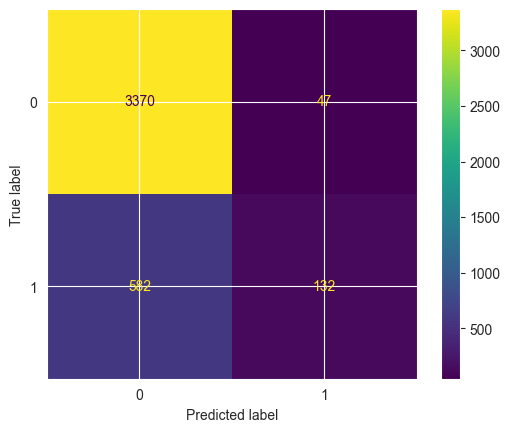

In [1050]:
max_depth = 4
X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1 = split_train_test(df)
rf = RandomForestClassifier(max_depth=max_depth)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test_1)

accuracy = accuracy_score(y_test_1, y_predict)
precision = precision_score(y_test_1, y_predict)
recall = recall_score(y_test_1, y_predict)
f1score = f1_score(y_test_1, y_predict)

print("Accuracy: ",accuracy*100, "%")
print("Recall: ", recall*100, "%")
print("Precision: ", precision*100, "%")
print("F1 Score: ", f1score*100, "%")
## Confusion Matrix
matrix = confusion_matrix(y_test_1,y_predict,labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rf.classes_)
disp.plot()
plt.show()

<h2>Dabei von dem Random Forest Classifier genutzte Parameter<h2>

In [1051]:
print("Parameters currently in use:\n")
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


<h2>Betrachtung der 10 Features, die bei diesem Random Forest Classifier am stärksten zur Klassifizierung beigetragen haben. Erstellen von Arrays mit Hyperparameterwerten, die für die GridSearch genutzt werden sollen<h2>

{'max_depth': [5, 50, None], 'n_estimators': [100, 1000]}


C:\Users\svenb\AppData\Local\Temp\ipykernel_7052\3536805271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_features["RESP"] = df["RESP"]


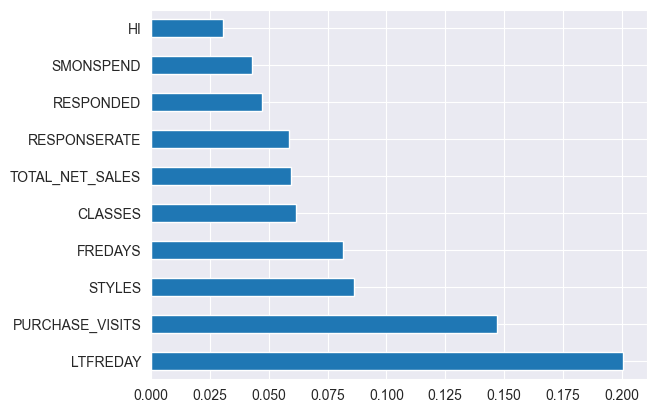

In [1052]:
# top 10 features werden für das TRaining der kommenden Random Forest Classifier genutzt
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
important_features = feat_importances.nlargest(10).index


df_important_features = df[important_features]
df_important_features["RESP"] = df["RESP"]
X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1 = split_train_test(df_important_features)

# Hyperparameter werden für die GridSearch herausgesucht. Auskommentierte Zeilen können hinzugefügt werden:
# Allgemein gilt: Es müssen nicht extrem viele Werte und Hyperparameter durchlaufen werden, wichtig ist, dass der Sinn einer GridSearch verstanden wurde!

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=2)]
# Number of features to consider at every split
#max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
"""min_samples_split = [2,5,10]"""
# Minimum number of samples required at each leaf node
"""min_samples_leaf = [1,2,4]"""
# Method of selecting samples for training each tree
"""bootstrap = [True, False]"""

# Create the random grid
random_grid = {"n_estimators":n_estimators,
               #"max_features":max_features,
               "max_depth":max_depth}
#"min_samples_split":min_samples_split,
#"min_samples_leaf":min_samples_leaf,
#"bootstrap":bootstrap}
pprint(random_grid)

<h2>Funktion (Scorefunction) zur Berechnung des Gewinns/Verlustes gemäß der Aufgabenstellung (Gewinnmatrix)<h2>

In [1053]:
def get_result_score(y_test, y_predicted):

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    y_true = y_test.to_list()
    y_predicted = y_predicted.tolist()

    for i in range(len(y_predicted)):
        if y_true[i]==y_predicted[i]==1:
            TP += 1
        if y_predicted[i]==1 and y_true[i]!=y_predicted[i]:
            FP += 1
        if y_true[i]==y_predicted[i]==0:
            TN += 1
        if y_predicted[i]==0 and y_true[i]!=y_predicted[i]:
            FN += 1


    return (TP*16+FP*(-2)+TN*(0)+FN*(-16))

<h2>Klassifizierung erneut anhand eines Random Forest Classifiers, diesmal mit vorangegangener GridSearch mit oben bestimmten Hyperparameter(werten) und Optimierung auf Grundlage der Ergebnisse der definierten individuellen Scorer Funktion<h2>

In [1054]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Create new base model
rf = RandomForestClassifier(random_state = 4711)

rf.fit(X_train, y_train)
y_predict = rf.predict(X_test_1)

result_scorer = make_scorer(get_result_score)       #eigenen Scorer für GridSearch

# Random search for parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random_result_score = GridSearchCV(estimator = rf, param_grid = random_grid,
                                      cv = 3, verbose = 2,
                                      n_jobs = -1, scoring = result_scorer)

rf_random_result_accuracy = GridSearchCV(estimator = rf, param_grid = random_grid,
                                         cv = 3, verbose = 2,
                                         n_jobs = -1)

"""Andere Scorer Funktionen prüfen!!!"""

rf_random_result_score_res = rf_random_result_score.fit(X_train, y_train)
rf_random_result_accuracy_res = rf_random_result_accuracy.fit(X_train, y_train)

print("Best Score mit eigener Funktion: ",rf_random_result_score_res.best_score_)
print("Mit besten Parametern: ",rf_random_result_score_res.best_params_)
print("Best Score nach Accuracy: ",rf_random_result_accuracy_res.best_score_)
print("Mit besten Parametern: ",rf_random_result_accuracy_res.best_params_)
# Ausgabe des besten Scores (auf Grundlage der durchlaufenden Hyperparameter)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Score mit eigener Funktion:  -6414.666666666667
Mit besten Parametern:  {'max_depth': 50, 'n_estimators': 1000}
Best Score nach Accuracy:  0.855768029132351
Mit besten Parametern:  {'max_depth': 5, 'n_estimators': 1000}


<h1>KNeighborsClassifier<h1>

Hauptkomponentenanalyse vor KNN?

In [1055]:
bestfeatures_chi = SelectKBest(chi2, k=10).fit(X_train,y_train)
print("Score features: ", bestfeatures_chi.scores_)
print("Columns: ", X_train.columns)

Score features:  [1.20156338e+05 2.19017723e+04 7.52824429e+04 1.10599805e+05
 9.18079686e+03 1.47413392e+06 6.40697468e+02 5.64336065e+03
 9.19000385e+05 1.89833630e+02]
Columns:  Index(['LTFREDAY', 'PURCHASE_VISITS', 'STYLES', 'FREDAYS', 'CLASSES',
       'TOTAL_NET_SALES', 'RESPONSERATE', 'RESPONDED', 'SMONSPEND', 'HI'],
      dtype='object')


In [1056]:
bestfeatures_classif = SelectKBest(f_classif, k=10).fit(X_train,y_train)
print("Score features: ", bestfeatures_classif.scores_)
print("Columns: ", X_train.columns)

Score features:  [1717.38165875 3262.35277239 2506.24767429  933.43797468 2650.59055185
 1957.25438701 2064.89401347 2275.28959072 1803.91068378  954.12223547]
Columns:  Index(['LTFREDAY', 'PURCHASE_VISITS', 'STYLES', 'FREDAYS', 'CLASSES',
       'TOTAL_NET_SALES', 'RESPONSERATE', 'RESPONDED', 'SMONSPEND', 'HI'],
      dtype='object')


{'LTFREDAY': 1717.3816587463868, 'PURCHASE_VISITS': 3262.3527723859015, 'STYLES': 2506.247674294947, 'FREDAYS': 933.4379746795731, 'CLASSES': 2650.5905518526265, 'TOTAL_NET_SALES': 1957.2543870129812, 'RESPONSERATE': 2064.8940134658515, 'RESPONDED': 2275.2895907223974, 'SMONSPEND': 1803.9106837816914, 'HI': 954.1222354673355}


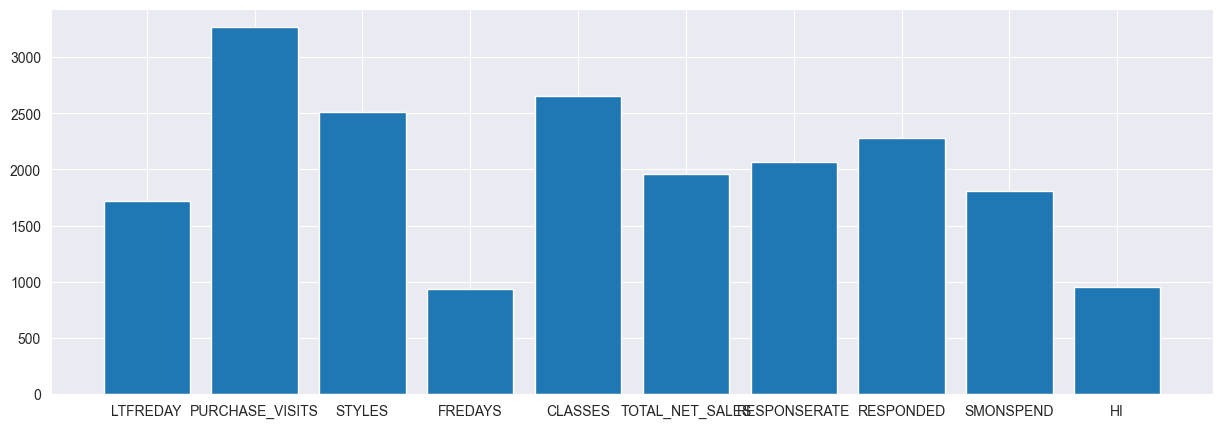

In [1057]:
dict = {X_train.columns[i]: bestfeatures_classif.scores_[i] for i in range(len(X_train.columns))}
print(dict)
fig = plt.figure(figsize=(15, 5))
plt.bar(range(len(dict)),list(dict.values()),align="center")
plt.xticks(range(len(dict)), list(dict.keys()))
plt.show()

In [1058]:
X_train_transformed = bestfeatures_classif.transform(X_train)
X_test_transformed = bestfeatures_classif.transform(X_test_1)

### Scaling on z-values

In [1059]:
X_train = preprocessing.StandardScaler().fit(X_train_transformed).transform(X_train_transformed.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_transformed).transform(X_test_transformed.astype(float))

In [1060]:
X_train

array([[ 1.08364777, -0.63602167, -0.58369118, ..., -0.65008338,
        -0.62880003,  1.50053396],
       [-0.67607243, -0.63602167, -0.54276942, ..., -0.65008338,
         0.09063584, -0.15285141],
       [-0.56604227,  0.46224266, -0.01078648, ...,  0.44028539,
         0.03259684, -0.19074223],
       ...,
       [ 0.3911947 , -0.63602167, -0.58369118, ..., -0.65008338,
        -0.62880003,  2.26578686],
       [-0.48104207, -0.16533696, -0.37908236, ..., -0.65008338,
        -0.62880003, -0.22013418],
       [-0.47519751,  0.14845285, -0.37908236, ..., -0.10489899,
        -0.36990444, -0.38904932]])

In [1061]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(30)
mean_score = np.zeros(30)
for i in range(1,31):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    ypredicted = knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test_1, ypredicted)
    mean_score[i-1] = get_result_score(y_test_1, ypredicted)

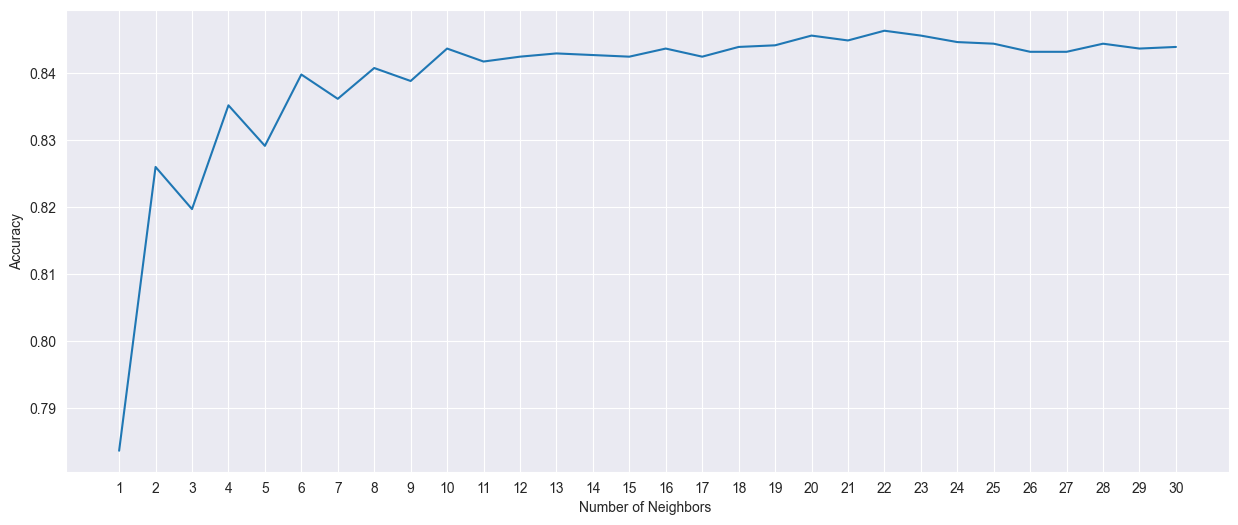

In [1062]:
loc = np.arange(1,31,step=1.0)
plt.figure(figsize = (15, 6))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

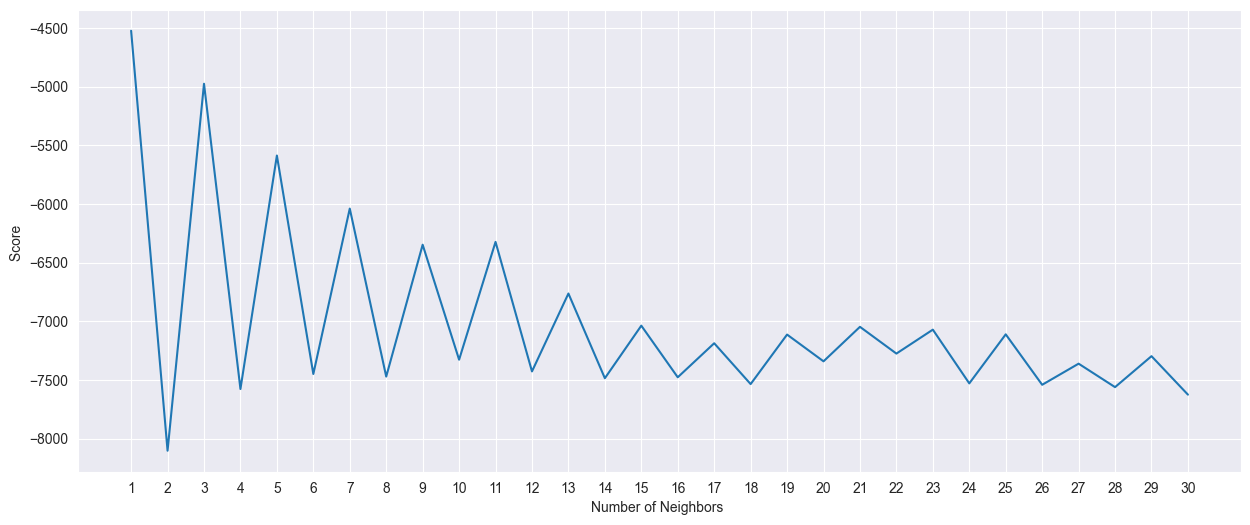

In [1063]:
loc = np.arange(1, 31, step=1.0)
plt.figure(figsize=(15, 6))
plt.plot(range(1, 31), mean_score)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Score ')
plt.show()

In [1064]:
grid_params = {"n_neighbors" : [1,2,5,7,9,11,13,15,17,19],
               "weights" : ["uniform","distance"],
               "metric" : ["minkowski","euclidian","manhattan"]}
knn = KNeighborsClassifier()
knn_random_result_score = GridSearchCV(estimator = knn, param_grid = grid_params,
                                      cv = 3, n_jobs = -1, scoring = result_scorer)
knn_random_result_accuracy = GridSearchCV(estimator = knn, param_grid = grid_params,
                                          cv = 3, n_jobs = -1)
knn_random_result_score_res = knn_random_result_score.fit(X_train, y_train)
knn_random_result_accuracy_res = knn_random_result_accuracy.fit(X_train, y_train)

print("Bester Score: ",knn_random_result_score_res.best_score_)
print("Mit Parametern: ",knn_random_result_score_res.best_params_)
print("Bester Accuracy: ",knn_random_result_accuracy_res.best_score_)
print("Mit Parametern: ",knn_random_result_accuracy_res.best_params_)

C:\Users\svenb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\svenb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\svenb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\svenb\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\svenb\anaconda3\lib\si

Bester Score:  -5621.333333333333
Mit Parametern:  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Bester Accuracy:  0.8481419655721286
Mit Parametern:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


C:\Users\svenb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\svenb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\svenb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\svenb\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\svenb\anaconda3\lib\si

<h1>NaiveBayesClassifier<h1>

In [1065]:
def NaiveBayes(df):
    X_train, X_test_2, y_train, y_test_2, X_test_1, y_test_1 = split_train_test(df)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_predict = gnb.predict(X_test_1)
    accuracy = accuracy_score(y_test_1, y_predict)

    print("Accuracy: ",accuracy*100, "%")

    ## Confusion Matrix
    matrix = confusion_matrix(y_test_1,y_predict,labels=gnb.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=gnb.classes_)
    disp.plot()
    plt.show()

Accuracy:  82.01404018397483 %


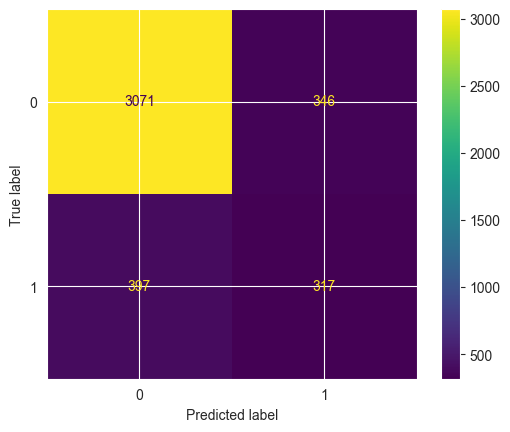

In [1066]:
NaiveBayes(df)